# "10 minutes to pandas"

#### Source: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [1]:
import numpy as np
import pandas as pd



In [2]:
pd.Series([1, 3, 5, np.nan, 6, 8]) # creating Series with list of values

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range("20130101", periods=6) # ndarray-like w/ datetime64 data aka DatetimeIndex
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# created DataFrame with datetime index and labeled columns
# DataFrame constructor can have
# ndarray (structured or homogeneous), Iterable, dict, or DataFrame
# passed in
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))

df

,A,B,C,D
2013-01-01,0.094108,-0.364054,0.535787,-0.209850
2013-01-02,0.491523,-0.766767,-0.776949,-0.542531
2013-01-03,-0.413487,0.009382,0.874176,0.771756
2013-01-04,0.025349,0.017845,-0.670890,0.544429
2013-01-05,0.145774,-0.084932,0.890830,0.131040
2013-01-06,-0.854184,0.237910,-0.979298,-0.426149


In [5]:
# passing dict to make DataFrame
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    })

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
# some DataFrame dtypes (of df2)

df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.094108,-0.364054,0.535787,-0.209850
2013-01-02,0.491523,-0.766767,-0.776949,-0.542531
2013-01-03,-0.413487,0.009382,0.874176,0.771756
2013-01-04,0.025349,0.017845,-0.670890,0.544429
2013-01-05,0.145774,-0.084932,0.890830,0.131040


In [8]:
df.tail(3) # top and bottom, yay

,A,B,C,D
2013-01-04,0.025349,0.017845,-0.670890,0.544429
2013-01-05,0.145774,-0.084932,0.890830,0.131040
2013-01-06,-0.854184,0.237910,-0.979298,-0.426149


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.to_numpy() # dataframe into numpy ndarray (not expensive cuz all floating point)

array([[ 0.09410826, -0.36405438,  0.53578698, -0.20984956],
       [ 0.49152326, -0.76676722, -0.77694875, -0.54253133],
       [-0.41348687,  0.00938191,  0.87417568,  0.77175638],
       [ 0.02534887,  0.01784478, -0.67088953,  0.54442911],
       [ 0.1457742 , -0.08493182,  0.8908302 ,  0.13104015],
       [-0.85418356,  0.23790978, -0.97929764, -0.42614944]])

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [13]:
df.describe() # data sum

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.085153,-0.158436,-0.021057,0.044783
std,0.475277,0.356111,0.878059,0.532378
min,-0.854184,-0.766767,-0.979298,-0.542531
25%,-0.303778,-0.294274,-0.750434,-0.372074
50%,0.059729,-0.037775,-0.067551,-0.039405
75%,0.132858,0.015729,0.789579,0.441082
max,0.491523,0.237910,0.890830,0.771756


In [14]:
df.T # transpose

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.094108,0.491523,-0.413487,0.025349,0.145774,-0.854184
B,-0.364054,-0.766767,0.009382,0.017845,-0.084932,0.237910
C,0.535787,-0.776949,0.874176,-0.670890,0.890830,-0.979298
D,-0.209850,-0.542531,0.771756,0.544429,0.131040,-0.426149


In [15]:
df.sort_index(axis=1, ascending=False) # let's sort the axis (flip the cols :o)

,D,C,B,A
2013-01-01,-0.209850,0.535787,-0.364054,0.094108
2013-01-02,-0.542531,-0.776949,-0.766767,0.491523
2013-01-03,0.771756,0.874176,0.009382,-0.413487
2013-01-04,0.544429,-0.670890,0.017845,0.025349
2013-01-05,0.131040,0.890830,-0.084932,0.145774
2013-01-06,-0.426149,-0.979298,0.237910,-0.854184


In [16]:
df.sort_values(by="B")

,A,B,C,D
2013-01-02,0.491523,-0.766767,-0.776949,-0.542531
2013-01-01,0.094108,-0.364054,0.535787,-0.209850
2013-01-05,0.145774,-0.084932,0.890830,0.131040
2013-01-03,-0.413487,0.009382,0.874176,0.771756
2013-01-04,0.025349,0.017845,-0.670890,0.544429
2013-01-06,-0.854184,0.237910,-0.979298,-0.426149


In [17]:
df["A"]

2013-01-01    0.094108
2013-01-02    0.491523
2013-01-03   -0.413487
2013-01-04    0.025349
2013-01-05    0.145774
2013-01-06   -0.854184
Freq: D, Name: A, dtype: float64

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,0.094108,-0.364054,0.535787,-0.209850
2013-01-02,0.491523,-0.766767,-0.776949,-0.542531
2013-01-03,-0.413487,0.009382,0.874176,0.771756


In [19]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.491523,-0.766767,-0.776949,-0.542531
2013-01-03,-0.413487,0.009382,0.874176,0.771756
2013-01-04,0.025349,0.017845,-0.670890,0.544429


In [20]:
df.loc[dates[0]]

A    0.094108
B   -0.364054
C    0.535787
D   -0.209850
Name: 2013-01-01 00:00:00, dtype: float64

In [21]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.094108,-0.364054
2013-01-02,0.491523,-0.766767
2013-01-03,-0.413487,0.009382
2013-01-04,0.025349,0.017845
2013-01-05,0.145774,-0.084932
2013-01-06,-0.854184,0.237910


In [22]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.491523,-0.766767
2013-01-03,-0.413487,0.009382
2013-01-04,0.025349,0.017845


In [23]:
df.loc["20130102", ["A", "B"]]

A    0.491523
B   -0.766767
Name: 2013-01-02 00:00:00, dtype: float64

In [24]:
df.loc[dates[0], "A"]

0.09410825635050077

In [25]:
df.at[dates[0], "A"] # faster to get scalar than previous line

0.09410825635050077

In [26]:
df.iloc[3]

A    0.025349
B    0.017845
C   -0.670890
D    0.544429
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.025349,0.017845
2013-01-05,0.145774,-0.084932


In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.491523,-0.776949
2013-01-03,-0.413487,0.874176
2013-01-05,0.145774,0.890830


In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.491523,-0.766767,-0.776949,-0.542531
2013-01-03,-0.413487,0.009382,0.874176,0.771756


In [30]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.364054,0.535787
2013-01-02,-0.766767,-0.776949
2013-01-03,0.009382,0.874176
2013-01-04,0.017845,-0.670890
2013-01-05,-0.084932,0.890830
2013-01-06,0.237910,-0.979298


In [31]:
df.iloc[1, 1]

-0.7667672170435268

In [32]:
df.iat[1, 1] # faster for getting scalar than previous line

-0.7667672170435268

### boolean indexing

In [33]:
df[df["A"] > 0] # select whichever rows have A column value greater than 0

,A,B,C,D
2013-01-01,0.094108,-0.364054,0.535787,-0.209850
2013-01-02,0.491523,-0.766767,-0.776949,-0.542531
2013-01-04,0.025349,0.017845,-0.670890,0.544429
2013-01-05,0.145774,-0.084932,0.890830,0.131040


In [34]:
df[df > 0] # select whichever values in the dataframe are positive

,A,B,C,D
2013-01-01,0.094108,NaN,0.535787,NaN
2013-01-02,0.491523,NaN,NaN,NaN
2013-01-03,NaN,0.009382,0.874176,0.771756
2013-01-04,0.025349,0.017845,NaN,0.544429
2013-01-05,0.145774,NaN,0.890830,0.131040
2013-01-06,NaN,0.237910,NaN,NaN


In [35]:
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2013-01-01,0.094108,-0.364054,0.535787,-0.209850,one
2013-01-02,0.491523,-0.766767,-0.776949,-0.542531,one
2013-01-03,-0.413487,0.009382,0.874176,0.771756,two
2013-01-04,0.025349,0.017845,-0.670890,0.544429,three
2013-01-05,0.145774,-0.084932,0.890830,0.131040,four
2013-01-06,-0.854184,0.237910,-0.979298,-0.426149,three


In [36]:
df2[df2["E"].isin(["two", "four"])] # select rows that have column E value in the list
                                    # passed into .isin()

,A,B,C,D,E
2013-01-03,-0.413487,0.009382,0.874176,0.771756,two
2013-01-05,0.145774,-0.084932,0.890830,0.131040,four


In [37]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df["F"] = s1 # adding column aligns new column in DataFrame with the indices

df

,A,B,C,D,F
2013-01-01,0.094108,-0.364054,0.535787,-0.209850,NaN
2013-01-02,0.491523,-0.766767,-0.776949,-0.542531,1.0
2013-01-03,-0.413487,0.009382,0.874176,0.771756,2.0
2013-01-04,0.025349,0.017845,-0.670890,0.544429,3.0
2013-01-05,0.145774,-0.084932,0.890830,0.131040,4.0
2013-01-06,-0.854184,0.237910,-0.979298,-0.426149,5.0


In [39]:
df.at[dates[0], "A"] = 0 # setting values by label

df

,A,B,C,D,F
2013-01-01,0.000000,-0.364054,0.535787,-0.209850,NaN
2013-01-02,0.491523,-0.766767,-0.776949,-0.542531,1.0
2013-01-03,-0.413487,0.009382,0.874176,0.771756,2.0
2013-01-04,0.025349,0.017845,-0.670890,0.544429,3.0
2013-01-05,0.145774,-0.084932,0.890830,0.131040,4.0
2013-01-06,-0.854184,0.237910,-0.979298,-0.426149,5.0


In [40]:
df.iat[0, 1] = 0 # setting values by position

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.535787,-0.209850,NaN
2013-01-02,0.491523,-0.766767,-0.776949,-0.542531,1.0
2013-01-03,-0.413487,0.009382,0.874176,0.771756,2.0
2013-01-04,0.025349,0.017845,-0.670890,0.544429,3.0
2013-01-05,0.145774,-0.084932,0.890830,0.131040,4.0
2013-01-06,-0.854184,0.237910,-0.979298,-0.426149,5.0


In [41]:
df.loc[:, "D"] = np.array([5] * len(df)) # assigning numpy array to column

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.535787,5,NaN
2013-01-02,0.491523,-0.766767,-0.776949,5,1.0
2013-01-03,-0.413487,0.009382,0.874176,5,2.0
2013-01-04,0.025349,0.017845,-0.670890,5,3.0
2013-01-05,0.145774,-0.084932,0.890830,5,4.0
2013-01-06,-0.854184,0.237910,-0.979298,5,5.0


In [42]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.535787,-5,NaN
2013-01-02,-0.491523,-0.766767,-0.776949,-5,-1.0
2013-01-03,-0.413487,-0.009382,-0.874176,-5,-2.0
2013-01-04,-0.025349,-0.017845,-0.670890,-5,-3.0
2013-01-05,-0.145774,-0.084932,-0.890830,-5,-4.0
2013-01-06,-0.854184,-0.237910,-0.979298,-5,-5.0


### missing data

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"]) # reindex along axes
                                                                     # returns copy of the data

df1.loc[dates[0] : dates[1], "E"] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.535787,5,NaN,1.0
2013-01-02,0.491523,-0.766767,-0.776949,5,1.0,1.0
2013-01-03,-0.413487,0.009382,0.874176,5,2.0,NaN
2013-01-04,0.025349,0.017845,-0.670890,5,3.0,NaN


In [44]:
df1.dropna(how="any") # bye bye any rows w/ missing data

,A,B,C,D,F,E
2013-01-02,0.491523,-0.766767,-0.776949,5,1.0,1.0


In [45]:
df1.fillna(value=5) # fill in missing data

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.535787,5,5.0,1.0
2013-01-02,0.491523,-0.766767,-0.776949,5,1.0,1.0
2013-01-03,-0.413487,0.009382,0.874176,5,2.0,5.0
2013-01-04,0.025349,0.017845,-0.670890,5,3.0,5.0


In [46]:
pd.isna(df1) # boolean mask where vals are nan

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### stats

In [47]:
df.mean() # mean across axis 0 of DataFrame (across rows)

A   -0.100837
B   -0.097760
C   -0.021057
D    5.000000
F    3.000000
dtype: float64

In [48]:
df.mean(1) # mean ACROSS another axis (in this case, across columns)

2013-01-01    1.383947
2013-01-02    0.989561
2013-01-03    1.494014
2013-01-04    1.474461
2013-01-05    1.990335
2013-01-06    1.680886
Freq: D, dtype: float64

In [49]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.535787,5,NaN
2013-01-02,0.491523,-0.766767,-0.776949,5,1.0
2013-01-03,-0.413487,0.009382,0.874176,5,2.0
2013-01-04,0.025349,0.017845,-0.670890,5,3.0
2013-01-05,0.145774,-0.084932,0.890830,5,4.0
2013-01-06,-0.854184,0.237910,-0.979298,5,5.0


In [51]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.413487,-0.990618,-0.125824,4.0,1.0
2013-01-04,-2.974651,-2.982155,-3.670890,2.0,0.0
2013-01-05,-4.854226,-5.084932,-4.109170,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.535787,5,NaN
2013-01-02,0.491523,-0.766767,-0.241162,10,1.0
2013-01-03,0.078036,-0.757385,0.633014,15,3.0
2013-01-04,0.103385,-0.739541,-0.037876,20,6.0
2013-01-05,0.249159,-0.824472,0.852955,25,10.0
2013-01-06,-0.605024,-0.586563,-0.126343,30,15.0


In [53]:
df.apply(lambda x: x.max() - x.min())

A    1.345707
B    1.004677
C    1.870128
D    0.000000
F    4.000000
dtype: float64

### histogramming

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))

s

0    3
1    4
2    3
3    1
4    5
5    3
6    4
7    0
8    4
9    0
dtype: int64

In [55]:
s.value_counts() # makin' a histogram

3    3
4    3
0    2
1    1
5    1
dtype: int64

### string methods

In [56]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### merge

In [57]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,0.266035,-0.013438,-0.083713,0.465020
1,1.600012,-0.353038,-1.944700,-1.708484
2,0.457865,-0.865079,-1.160512,-0.518920
3,1.356296,-0.009200,0.390753,0.029553
4,-0.746994,-1.532146,0.446518,1.215317
5,-1.319387,-0.093396,1.307915,0.114582
6,-0.794778,0.202959,1.012961,0.548612
7,-0.832015,-0.368804,0.038283,0.532502
8,1.792546,-1.340828,0.241058,1.258697
9,0.856918,-0.914586,-0.035887,0.660740


In [58]:
# break into pieces
pieces = [df[:3], df[3:7], df[7:]]

pieces

[          0         1         2         3
 0  0.266035 -0.013438 -0.083713  0.465020
 1  1.600012 -0.353038 -1.944700 -1.708484
 2  0.457865 -0.865079 -1.160512 -0.518920,
           0         1         2         3
 3  1.356296 -0.009200  0.390753  0.029553
 4 -0.746994 -1.532146  0.446518  1.215317
 5 -1.319387 -0.093396  1.307915  0.114582
 6 -0.794778  0.202959  1.012961  0.548612,
           0         1         2         3
 7 -0.832015 -0.368804  0.038283  0.532502
 8  1.792546 -1.340828  0.241058  1.258697
 9  0.856918 -0.914586 -0.035887  0.660740]

In [59]:
# concat back together!
pd.concat(pieces)

,0,1,2,3
0,0.266035,-0.013438,-0.083713,0.465020
1,1.600012,-0.353038,-1.944700,-1.708484
2,0.457865,-0.865079,-1.160512,-0.518920
3,1.356296,-0.009200,0.390753,0.029553
4,-0.746994,-1.532146,0.446518,1.215317
5,-1.319387,-0.093396,1.307915,0.114582
6,-0.794778,0.202959,1.012961,0.548612
7,-0.832015,-0.368804,0.038283,0.532502
8,1.792546,-1.340828,0.241058,1.258697
9,0.856918,-0.914586,-0.035887,0.660740


In [60]:
# fun fact: adding column to DF is fast; adding row requires copy (expensive)

### join

In [61]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

left

,key,lval
0,foo,1
1,foo,2


In [62]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [64]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

left

,key,lval
0,foo,1
1,bar,2


In [65]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

right

,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


### grouping
1. splitting (into groups based on criteria)
2. applying (function to each group)
3. combining (results into one structure)

In [67]:
df = pd.DataFrame({
                    "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
                    "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
                    "C": np.random.randn(8),
                    "D": np.random.randn(8),
})

df

,A,B,C,D
0,foo,one,0.468192,0.800893
1,bar,one,-0.441182,0.494630
2,foo,two,-0.107686,0.211484
3,bar,three,0.102113,0.137191
4,foo,two,-0.766494,2.202960
5,bar,two,1.401553,0.510114
6,foo,one,-0.988177,0.551533
7,foo,three,1.355332,-1.482977


In [68]:
0.867052 + 1.570659 + 0.865581 + 1.063402 + 0.791839 # should be sum of C foo vals

5.158533

In [69]:
df.groupby("A").sum()

,C,D
A,,
bar,1.062485,1.141936
foo,-0.038833,2.283892


In [70]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.441182  0.494630
    three  0.102113  0.137191
    two    1.401553  0.510114
foo one   -0.519986  1.352426
    three  1.355332 -1.482977
    two   -0.874180  2.414443

In [71]:
# above, foo one's should be 
0.867052 + 1.063402

1.9304540000000001

In [72]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
))

In [73]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [74]:
## quick break to explore packing
a = [[1, 2], [3, 4]]
print(type(a))
print(a)
print(list(zip(*a)))

<class 'list'>
[[1, 2], [3, 4]]
[(1, 3), (2, 4)]


In [75]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [76]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df

A         B
first second                    
bar   one    -1.191542 -0.377995
      two     1.059092  0.375318
baz   one    -0.093001 -0.135735
      two    -0.857291 -0.611462
foo   one    -1.749492  0.658886
      two    -0.318374  0.667470
qux   one     0.771585 -0.156747
      two    -2.824217  0.938039

In [77]:
df2 = df[:4]

df2

A         B
first second                    
bar   one    -1.191542 -0.377995
      two     1.059092  0.375318
baz   one    -0.093001 -0.135735
      two    -0.857291 -0.611462

In [78]:
stacked = df2.stack()

stacked

first  second   
bar    one     A   -1.191542
               B   -0.377995
       two     A    1.059092
               B    0.375318
baz    one     A   -0.093001
               B   -0.135735
       two     A   -0.857291
               B   -0.611462
dtype: float64

In [79]:
stacked.unstack()

A         B
first second                    
bar   one    -1.191542 -0.377995
      two     1.059092  0.375318
baz   one    -0.093001 -0.135735
      two    -0.857291 -0.611462

In [80]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.191542  1.059092
      B -0.377995  0.375318
baz   A -0.093001 -0.857291
      B -0.135735 -0.611462

In [81]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.191542 -0.093001
       B -0.377995 -0.135735
two    A  1.059092 -0.857291
       B  0.375318 -0.611462

### pivot tables

In [82]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

,A,B,C,D,E
0,one,A,foo,-0.867880,0.974428
1,one,B,foo,-0.658421,-0.281747
2,two,C,foo,-0.227288,0.634642
3,three,A,bar,0.751279,0.062688
4,one,B,bar,0.675346,0.195555
5,one,C,bar,-0.520438,2.127034
6,two,A,foo,0.746804,-0.216139
7,three,B,foo,-0.581679,-2.258291
8,one,C,foo,0.303436,-0.982429
9,one,A,bar,2.243896,-1.472160


In [83]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  2.243896 -0.867880
      B  0.675346 -0.658421
      C -0.520438  0.303436
three A  0.751279       NaN
      B       NaN -0.581679
      C  0.425168       NaN
two   A       NaN  0.746804
      B  1.339756       NaN
      C       NaN -0.227288

### time series

In [84]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [85]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts

2012-01-01 00:00:00    320
2012-01-01 00:00:01    473
2012-01-01 00:00:02    359
2012-01-01 00:00:03    426
2012-01-01 00:00:04     98
                      ... 
2012-01-01 00:01:35    361
2012-01-01 00:01:36    128
2012-01-01 00:01:37    158
2012-01-01 00:01:38    388
2012-01-01 00:01:39    480
Freq: S, Length: 100, dtype: int64

In [86]:
ts.resample("5Min").sum()

2012-01-01    26063
Freq: 5T, dtype: int64

In [87]:
rng = pd.date_range("3/6/2012 0:00", periods=5, freq="D")

rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [88]:
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -0.818171
2012-03-07   -1.202368
2012-03-08   -0.121342
2012-03-09    2.402699
2012-03-10    0.461692
Freq: D, dtype: float64

In [89]:
ts_utc = ts.tz_localize("UTC")

ts_utc

2012-03-06 00:00:00+00:00   -0.818171
2012-03-07 00:00:00+00:00   -1.202368
2012-03-08 00:00:00+00:00   -0.121342
2012-03-09 00:00:00+00:00    2.402699
2012-03-10 00:00:00+00:00    0.461692
Freq: D, dtype: float64

In [90]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.818171
2012-03-06 19:00:00-05:00   -1.202368
2012-03-07 19:00:00-05:00   -0.121342
2012-03-08 19:00:00-05:00    2.402699
2012-03-09 19:00:00-05:00    0.461692
Freq: D, dtype: float64

In [91]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [92]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31   -0.708066
2012-02-29    1.990565
2012-03-31    0.607077
2012-04-30   -0.702174
2012-05-31    1.519751
Freq: M, dtype: float64

In [93]:
ps = ts.to_period()

ps

2012-01   -0.708066
2012-02    1.990565
2012-03    0.607077
2012-04   -0.702174
2012-05    1.519751
Freq: M, dtype: float64

In [94]:
ps.to_timestamp()

2012-01-01   -0.708066
2012-02-01    1.990565
2012-03-01    0.607077
2012-04-01   -0.702174
2012-05-01    1.519751
Freq: MS, dtype: float64

In [95]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [96]:
ts = pd.Series(np.random.randn(len(prng)), prng)

ts

1990Q1   -0.375549
1990Q2   -0.030621
1990Q3   -0.971443
1990Q4   -1.929378
1991Q1   -1.073672
1991Q2    0.651531
1991Q3   -0.722959
1991Q4    1.130447
1992Q1   -0.868689
1992Q2    1.532179
1992Q3    0.070007
1992Q4    0.838932
1993Q1    0.340422
1993Q2   -1.588980
1993Q3    1.192672
1993Q4   -1.064759
1994Q1   -0.205804
1994Q2    0.648947
1994Q3    1.968536
1994Q4   -1.042512
1995Q1   -1.550649
1995Q2    0.122290
1995Q3    0.440182
1995Q4   -0.258639
1996Q1    0.132307
1996Q2    0.369297
1996Q3   -0.024764
1996Q4   -0.472180
1997Q1    0.735994
1997Q2    0.191021
1997Q3    0.023993
1997Q4    0.924278
1998Q1    0.655908
1998Q2    2.502480
1998Q3   -0.983533
1998Q4   -0.408657
1999Q1    0.578931
1999Q2    1.575626
1999Q3   -1.760673
1999Q4    0.447927
2000Q1    1.205509
2000Q2    0.715358
2000Q3   -0.612187
2000Q4    1.040689
Freq: Q-NOV, dtype: float64

In [97]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

ts.head()

1990-03-01 09:00   -0.375549
1990-06-01 09:00   -0.030621
1990-09-01 09:00   -0.971443
1990-12-01 09:00   -1.929378
1991-03-01 09:00   -1.073672
Freq: H, dtype: float64

In [98]:
df = pd.DataFrame({"id": [1,2,3,4,5,6], "raw_grade": ["a", "b", "b", "a", "a", "e"]})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [99]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [100]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [101]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [102]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [103]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### plotting

In [104]:
import matplotlib.pyplot as plt

plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts

2000-01-01   -0.216869
2000-01-02   -0.524339
2000-01-03    0.561435
2000-01-04    0.234583
2000-01-05   -1.043384
                ...   
2002-09-22   -0.899813
2002-09-23    0.374720
2002-09-24   -0.915176
2002-09-25    0.899417
2002-09-26   -0.032582
Freq: D, Length: 1000, dtype: float64

In [105]:
ts = ts.cumsum()

ts

2000-01-01    -0.216869
2000-01-02    -0.741208
2000-01-03    -0.179772
2000-01-04     0.054811
2000-01-05    -0.988573
                ...    
2002-09-22   -82.749746
2002-09-23   -82.375026
2002-09-24   -83.290202
2002-09-25   -82.390785
2002-09-26   -82.423367
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

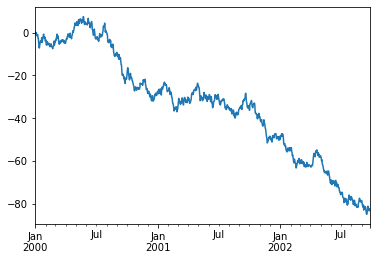

In [106]:
ts.plot()

In [107]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df

,A,B,C,D
2000-01-01,-0.165862,1.018839,0.592151,-0.217865
2000-01-02,1.004565,0.873130,-0.244185,0.631003
2000-01-03,0.382574,-1.088264,-1.018666,2.539736
2000-01-04,-0.494856,-0.788652,1.686438,-0.964923
2000-01-05,0.544918,1.208173,-0.669627,-0.565941
...,...,...,...,...
2002-09-22,0.470275,0.476544,0.734781,-0.372338
2002-09-23,-0.112546,1.074831,0.034387,-0.082778
2002-09-24,-0.626193,0.881035,0.281069,-0.206854
2002-09-25,-2.271645,-0.177793,-0.005105,0.117083


In [108]:
df = df.cumsum()

df

,A,B,C,D
2000-01-01,-0.165862,1.018839,0.592151,-0.217865
2000-01-02,0.838703,1.891970,0.347966,0.413138
2000-01-03,1.221277,0.803706,-0.670700,2.952875
2000-01-04,0.726421,0.015053,1.015738,1.987952
2000-01-05,1.271340,1.223226,0.346110,1.422011
...,...,...,...,...
2002-09-22,-66.078645,-49.740855,-71.002997,10.154778
2002-09-23,-66.191191,-48.666024,-70.968610,10.072000
2002-09-24,-66.817384,-47.784989,-70.687540,9.865146
2002-09-25,-69.089030,-47.962782,-70.692645,9.982230


In [109]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

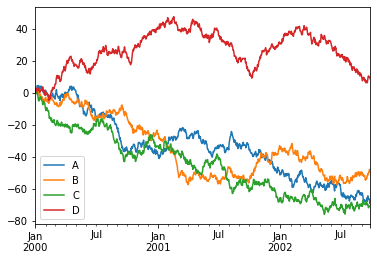

In [110]:
df.plot()

No handles with labels found to put in legend.


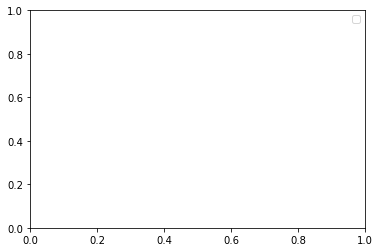

In [111]:
plt.legend(loc='best') # maybe a new version came out, rip

### csv

In [112]:
df.to_csv("foo.csv")

In [113]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.165862,1.018839,0.592151,-0.217865
1,2000-01-02,0.838703,1.891970,0.347966,0.413138
2,2000-01-03,1.221277,0.803706,-0.670700,2.952875
3,2000-01-04,0.726421,0.015053,1.015738,1.987952
4,2000-01-05,1.271340,1.223226,0.346110,1.422011
...,...,...,...,...,...
995,2002-09-22,-66.078645,-49.740855,-71.002997,10.154778
996,2002-09-23,-66.191191,-48.666024,-70.968610,10.072000
997,2002-09-24,-66.817384,-47.784989,-70.687540,9.865146
998,2002-09-25,-69.089030,-47.962782,-70.692645,9.982230


### hdfs... eh, too lazy to do it

### excel -- fine, I'll do this one... seems semi-relevant

In [115]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

ModuleNotFoundError: No module named 'openpyxl'